In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.svm import SVC
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

In [2]:
# Importing the dataset
dataframe = pd.read_csv('./Iris.csv')

In [3]:
dataframe

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


## Visualization

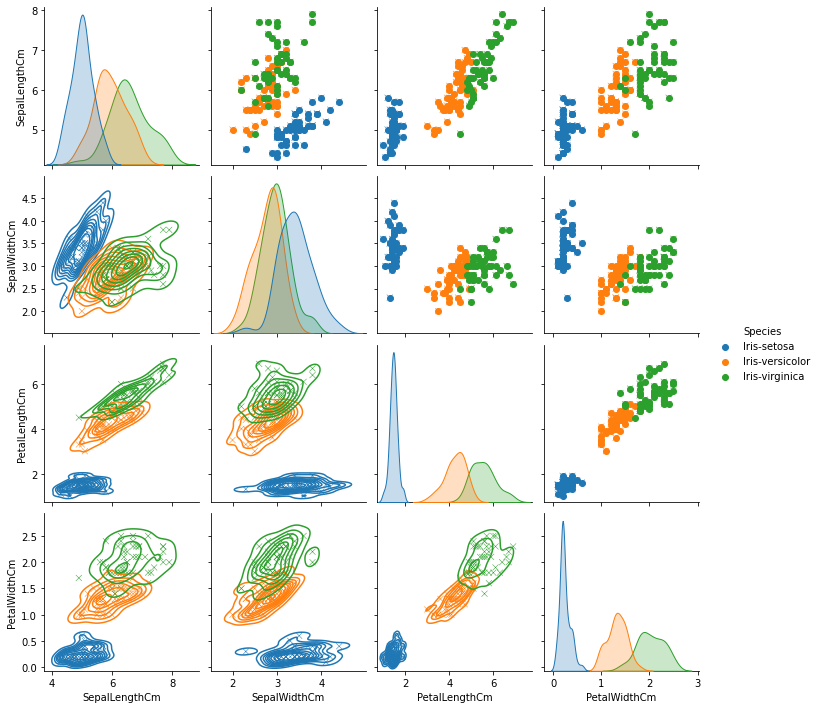

In [4]:
snsdata = dataframe.drop(['Id'], axis=1)
g = sns.pairplot(snsdata, hue='Species', markers='x')
g = g.map_upper(plt.scatter)
g = g.map_lower(sns.kdeplot)

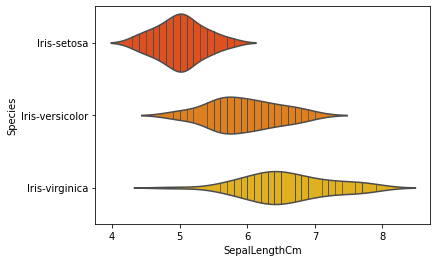

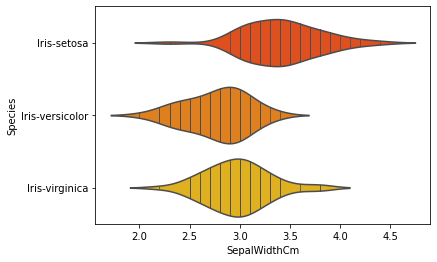

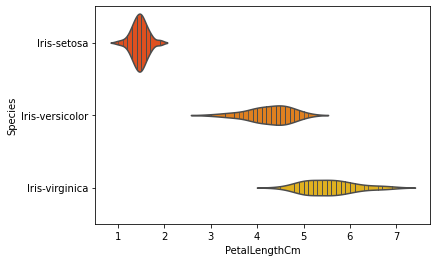

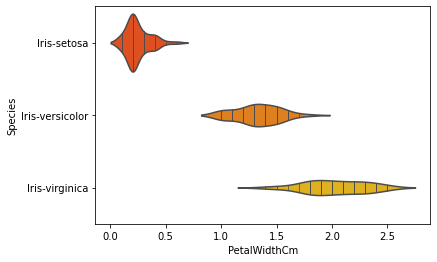

In [5]:
# Violin Plot
sns.violinplot(x='SepalLengthCm', y='Species', data=dataframe, inner='stick', palette='autumn')
plt.show()
sns.violinplot(x='SepalWidthCm', y='Species', data=dataframe, inner='stick', palette='autumn')
plt.show()
sns.violinplot(x='PetalLengthCm', y='Species', data=dataframe, inner='stick', palette='autumn')
plt.show()
sns.violinplot(x='PetalWidthCm', y='Species', data=dataframe, inner='stick', palette='autumn')
plt.show()

## Split Dataset

In [6]:
#Spliting the dataset
X = dataframe.iloc[:,:4].values
y = dataframe['Species'].values

In [7]:
# Spliting dataset to training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

In [8]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Linear Kernel

In [9]:
# Fitting SVC Classification using linear kernel
svcclassifier = SVC(kernel = 'linear', random_state = 0)
svcclassifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [10]:
# Predicting the Test set results
y_pred = svcclassifier.predict(X_test)
print(y_pred)

['Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor']


In [11]:
#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

array([['Iris-virginica', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa']], dtype=object)

In [12]:
# Making the report and Confusion Matrix function
def model_report(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test,y_pred)
    print("Confusion Matrix\n", cm)
    print("\n", report)
    a = cm.shape
    corrPred = 0
    falsePred = 0

    for row in range(a[0]):
        for c in range(a[1]):
            if row == c:
                corrPred +=cm[row,c]
            else:
                falsePred += cm[row,c]
    print("\n\nModel Summary")
    print('Correct predictions \t:', corrPred)
    print('False predictions \t:', falsePred)
    kernelLinearAccuracy = corrPred/(cm.sum())
    print ('Accuracy of the SVC Clasification is: ', corrPred/(cm.sum()))      

    return cm, report, kernelLinearAccuracy


In [13]:
LinearReport = model_report(y_test,y_pred)

Confusion Matrix
 [[11  0  0]
 [ 0  9  0]
 [ 0  0 10]]

                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Model Summary
Correct predictions 	: 30
False predictions 	: 0
Accuracy of the SVC Clasification is:  1.0


## Radial Basis Function Kernel

In [14]:
# Fitting SVC Classification using linear kernel
svcclassifier = SVC(kernel = 'rbf', random_state = 0)
svcclassifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = svcclassifier.predict(X_test)
print(y_pred)

['Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor']


In [15]:
#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

array([['Iris-virginica', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa']], dtype=object)

In [16]:
RBFReport = model_report(y_test,y_pred)

Confusion Matrix
 [[11  0  0]
 [ 0  9  0]
 [ 0  0 10]]

                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        10

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Model Summary
Correct predictions 	: 30
False predictions 	: 0
Accuracy of the SVC Clasification is:  1.0


## Polinomial Kernel

In [17]:
# Fitting SVC Classification using linear kernel
svcclassifier = SVC(kernel = 'poly', random_state = 0)
svcclassifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = svcclassifier.predict(X_test)
print(y_pred)

['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor']


In [18]:
#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

array([['Iris-virginica', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-versicolor'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa']], dtype=object)

In [19]:
PolinomialReport = model_report(y_test,y_pred)

Confusion Matrix
 [[11  0  0]
 [ 0  9  0]
 [ 0  1  9]]

                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.90      1.00      0.95         9
 Iris-virginica       1.00      0.90      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



Model Summary
Correct predictions 	: 29
False predictions 	: 1
Accuracy of the SVC Clasification is:  0.9666666666666667


## Sigmoid Kernel

In [20]:
# Fitting SVC Classification using linear kernel
svcclassifier = SVC(kernel = 'sigmoid', random_state = 0)
svcclassifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = svcclassifier.predict(X_test)
print(y_pred)

['Iris-virginica' 'Iris-virginica' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa' 'Iris-virginica'
 'Iris-versicolor']


In [21]:
#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

array([['Iris-virginica', 'Iris-virginica'],
       ['Iris-virginica', 'Iris-virginica'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa'],
       ['Iris-setosa', 'Iris-setosa']], dtype=object)

In [22]:
SigmoidReport = model_report(y_test,y_pred)

Confusion Matrix
 [[11  0  0]
 [ 0  7  2]
 [ 0  0 10]]

                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.78      0.88         9
 Iris-virginica       0.83      1.00      0.91        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30



Model Summary
Correct predictions 	: 28
False predictions 	: 2
Accuracy of the SVC Clasification is:  0.9333333333333333


In [24]:
# Summary
cm, report, kernelLinearAccuracy = LinearReport
cm, report, kernelRbfAccuracy = RBFReport
cm, report, kernelPolyAccuracy = PolinomialReport
cm, report, kernelSigmoidAccuracy = SigmoidReport

print('Accuracy of SVC classfication with different kernels and no other adjust are :\n')
print ('Accuracy of the SVC Clasification with Linear kernel: \t\t\t', kernelLinearAccuracy)
print ('Accuracy of the SVC Clasification with Radial Basis Function kernel: \t', kernelRbfAccuracy)
print ('Accuracy of the SVC Clasification with Polynomial kernel: \t\t', kernelPolyAccuracy)
print ('Accuracy of the SVC Clasification with Sigmoid kernel: \t\t\t', kernelSigmoidAccuracy)


print("\n\nReport Detail: \n")
print("Linear Report:\n", "Confusion Matrix\n", cm,"\n",report)
print("\nRBF Report:\n", "Confusion Matrix\n", cm,"\n",report)
print("\nPolinomial Report:\n", "Confusion Matrix\n", cm,"\n",report)
print("\nSigmoid Report:\n", "Confusion Matrix\n", cm,"\n",report)

Accuracy of SVC classfication with different kernels and no other adjust are :

Accuracy of the SVC Clasification with Linear kernel: 			 1.0
Accuracy of the SVC Clasification with Radial Basis Function kernel: 	 1.0
Accuracy of the SVC Clasification with Polynomial kernel: 		 0.9666666666666667
Accuracy of the SVC Clasification with Sigmoid kernel: 			 0.9333333333333333


Report Detail: 

Linear Report:
 Confusion Matrix
 [[11  0  0]
 [ 0  7  2]
 [ 0  0 10]] 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.78      0.88         9
 Iris-virginica       0.83      1.00      0.91        10

       accuracy                           0.93        30
      macro avg       0.94      0.93      0.93        30
   weighted avg       0.94      0.93      0.93        30


RBF Report:
 Confusion Matrix
 [[11  0  0]
 [ 0  7  2]
 [ 0  0 10]] 
                  precision    recall  f1-score   support

  